# Adam Forestier
### Last Updated: October 13, 2023
This file contains introduction to Neural Network Regression with Tensorflow II

In [369]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.ensemble import (AdaBoostRegressor, RandomForestRegressor)
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, OneHotEncoder)

## Example Regression Problems: How Much or How Many
- How much will this house sell for
- How many people will buy this app
- How much will my health insurance be
- How much should I save each week for fuel

Definition: Predicting a numerical variable (dependent variable) based on other variables (independent variables)

### Regression Inputs & Outputs (I/0)
- Input = Features (Numerically encode them)
- Output = numerical prediction. Shape is often 1

### Anatomy & Architecture of Neural Network Regression Models
**Hyperparameters**
- *Input Layer Shape* - Same shape as # of features
- *Hidden Layers* - Problem specific (min = 1, max = unlimited)
- *Neurons per hidden layer* - Problem specific, generally 10 to 100
- *Output layer shape* - same shape as desired prediction shape (ex: 1 for house price)
- *Hidden Activation* - Usually ReLU (rectified linear unit)
- *Output Activation* - None, ReLU, logistic/tanh
- *Loss Function* - Mean Square Error or Mean Absolute Error or Huber (combination of MAE/MSE)
- *Optimizer* - SGD (Stochastic Gradient Descent) or Adam

Text(0, 0.5, 'y sample data')

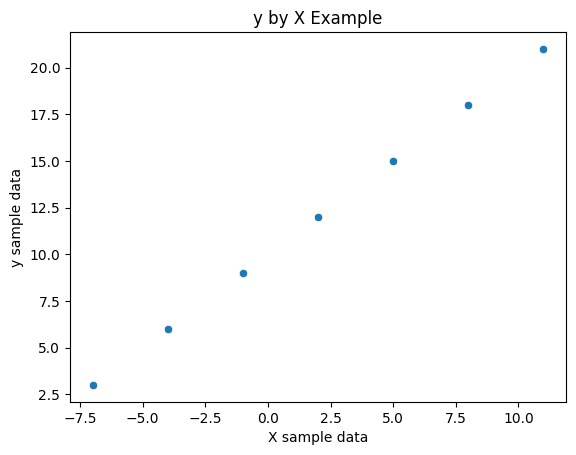

In [276]:
# Creating Sample Regression Data

# NOTE: numpy default datatype is float64, tensorflow wants float 32.

# Feature
X = tf.constant(np.arange(-7.0, 14.0, 3), dtype='float32')

# Label
y = tf.constant(np.arange(3.0, 24.0, 3), dtype='float32')

# Plot it
sns.scatterplot(x=X, y=y)
plt.title('y by X Example')
plt.xlabel(xlabel='X sample data')
plt.ylabel(ylabel='y sample data')

In [277]:
# Show that y = X + 10 (this is the pattern)
y == X + 10

<tf.Tensor: shape=(7,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True])>

**I/O NOTE** - in this specific example, I/O shape is 0 and 0. We are using 1 X value (scalar) to predict 1 y value (scalar). A scalar is a rank 0 tensor

## Steps in modeling in Tensorflow
1. Get data ready (turn into tensors, scaling, etc)
2. Build or pick a pretrained model to suit problem
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload trained model

###Even Simpler
1. *Create a model* - define I/O layers, as well as hidden layers of a deep learning model.
2. *Compile a model* - define a loss function (function which tells our model how wrong it is) and the optimizer (tells model how to improve the patterns it is learning) and evaluation metrics (what we use to interpret the performance of the model)
3. *Fit a model* - letting the model try to find patterns between X & y

In [278]:
# Let's see the process...
tf.random.set_seed(seed=42)

# create model using the Sequential API
model = tf.keras.Sequential(layers=[
  tf.keras.layers.Dense(units=1)
])

# can add layers instead of putting them in a tuple
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=1))

# compile the model
model.compile(
    loss=tf.keras.losses.mae, # Loss function = mean absolute error,
    optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics=['mae']
  )

# fit the model. Epochs = iterations
model.fit(x=tf.expand_dims(input=X, axis=-1), y=y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 595ms/step - loss: 11.3974 - mae: 11.3974
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3474 - mae: 11.3474
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2974 - mae: 11.2974
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2474 - mae: 11.2474
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1974 - mae: 11.1974


**Mean Absolute Error** - measure of errors between labels & predictions. It is the mean of the absolute value between y_true & y_pred.

**Mean Square Error** - Squares ther average errors

**Stochastic Gradient Descent (SGD)** is a fundamental optimization algorithm commonly used in machine learning and deep learning for training models. I'll explain it in a way that relates to programming and without assuming a deep statistical background.

1. Optimization Goal:

Imagine you have a mathematical model (like a neural network) with parameters that you want to adjust so that the model can make accurate predictions.
SGD helps you find the best values for these parameters to minimize a cost or loss function. The goal is to find the parameters that make your model's predictions as close as possible to the actual target values.
2. Iterative Process:

SGD is an iterative algorithm. It updates the model's parameters in small steps, trying to improve the model's performance with each step.
At each iteration, you process a random or shuffled subset of your data. This randomness is why it's called "stochastic" (random) gradient descent.
3. Gradient Descent:

In each iteration, you calculate the gradient of the cost function with respect to your model's parameters. Think of the gradient as the direction in which you should adjust your parameters to reduce the error.
The gradient points in the direction of the steepest increase in the cost function. To minimize the cost, you want to move in the opposite direction, which means subtracting the gradient from your parameters.
4. Learning Rate:

SGD uses a hyperparameter called the learning rate. This value determines the size of the steps you take during parameter updates.
If the learning rate is too large, you might overshoot the minimum and not converge. If it's too small, you might converge very slowly.
Finding the right learning rate often involves experimentation.
5. Updating Parameters:

Once you have the gradient and the learning rate, you update your model's parameters. The new parameter values are calculated as:
makefile
Copy code
new_parameter = old_parameter - (learning_rate * gradient)
You repeat this process for each parameter in your model.
6. Convergence:

SGD continues iterating until a stopping condition is met. This condition can be a fixed number of iterations, a certain level of cost function improvement, or other criteria.
Ideally, as you iterate, your cost function should decrease, and your model's performance should improve.
7. Mini-Batch Size:

In practice, you don't always use just one data point per iteration. Instead, you often use a mini-batch of data (a small random subset) to calculate the gradient and update the parameters. This can make the process more efficient and lead to faster convergence.
In summary, think of SGD as a process where you iteratively adjust your model's parameters using small random subsets of your data. You move in the direction that decreases your prediction errors, guided by the gradient of a cost function. With each iteration, you get closer to the best parameters for your model, which results in better predictions.

In [279]:
# Now let's use our fitted model to make a prediction!
y_pred = model.predict(x=[17.0]) # Because y = X + 10, should be = 27
y_pred # Lol this is terrible, but look at MAE! it is super high, need more epochs and need more data!

1/1 [==============================] - 0s 96ms/step


array([[6.872108]], dtype=float32)

### Improving our Model
We can improve our model by altering the steps we took to create model
1. **Create a model** - add more layers, increase number of hidden units (neurons), change the activation function of each layer
2. **Compile a model** - change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - fit a model for more epochs or on more data

In [280]:
# Improved model

# Create the model
tf.random.set_seed(seed=42)
model = tf.keras.Sequential()

# More neurons (hidden layers) with 100 hidden units
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))

# Output layer
model.add(layer=tf.keras.layers.Dense(units=1))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0135), # Optimizer changed to Adam. Lower learning rate (default = .01)
    loss=tf.keras.losses.mae
)

model.fit(x=tf.expand_dims(input=X, axis=-1), y=y, epochs=100) # More iterations

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.0715
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4625
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6118
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 4.5237
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 5.2756
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 4.2568
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 3.8884
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 4.7079
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1700
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 3.4651
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 4.1269
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 4.6345
Epoch 13/100
1/1 [==============================] - 0s

In [281]:
# Now, let's make a prediction
model.predict(x=[17.0]) # Expecting 27.0

1/1 [==============================] - 0s 87ms/step


array([[25.64676]], dtype=float32)

Pretty Darn Good!

**Common Ways to Improve a Deep Learning Model**
- Adding Layers
- Increase number of hidden units
- Change the activation functions
- Change the optimization function
- Change the learning rate (The most important hyperparameter of many neural networks)
- Fitting over more epochs

### Evaluating a Model
"Visualize, Visualize, Visualize":
- The data: what data are we working with? What does it look like?
- The model itself: what does our model look like?
- Training of model: how does a model perform while it learns?
- The predictions of the model: how do the predictions of the model line up against the ground truth?



<Axes: >

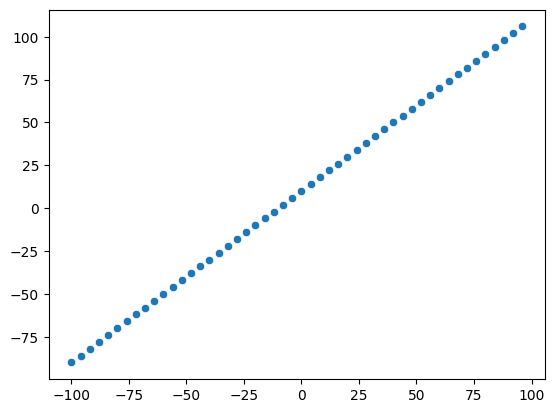

In [282]:
# Let's try a bigger dataset to visualize
X = tf.range(-100, 100, 4)
y = X + 10

sns.scatterplot(x=X, y=y)

### The 3 Datasets
1. **Training set** - model learns from this data. Typically 70 to 80% of data you have available
2. **Validation set** - the model gets tuned on this data. Typicall 10 to 15% of data you have available
3. **Test set** - model gets evaluated on this data to test what it has learned. Typically 10-15% of total data available

Sometimes, only have training set and test set

**Generalization** - Ability for a ml model to perform on data it hasn't seen before

In [283]:
# Split data  80/20 train and test sets
test_percent = len(X) * .2
train_precent = len(X) * .8
X_train, X_test, y_train, y_test = X[:int(len(X) * .8)], X[int(len(X) * .8):], y[:int(len(y) * .8)], y[int(len(y) * .8):]

<function matplotlib.pyplot.legend(*args, **kwargs)>

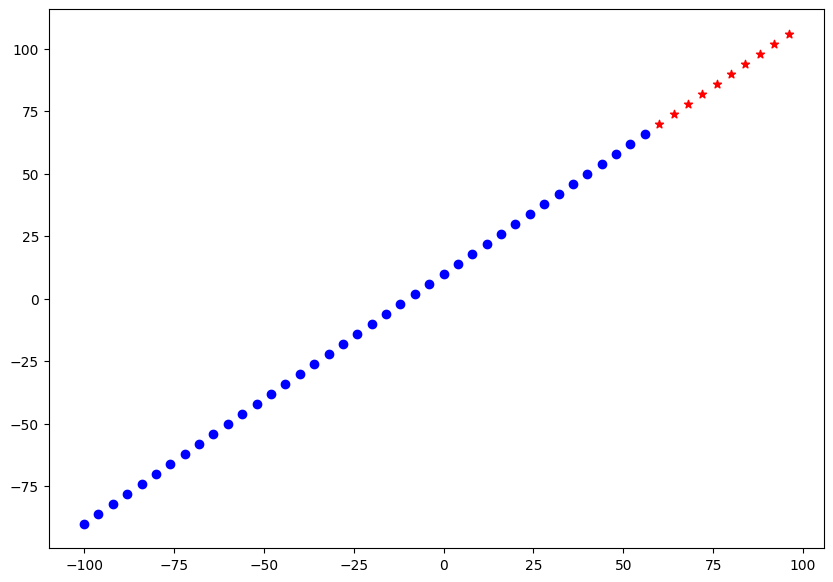

In [284]:
# Visualize the data
plt.figure(figsize=(10,7))

# Plot training data in blue, test in red
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker='o')
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker='*')
plt.legend

In [285]:
# Create model with split data

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1) # 1 output layer; 1 X, 1 y
])

my_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# model.fit(x=tf.expand_dims(X, axis=-1), y=y, epochs=100)

In [286]:
# Let's create model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(seed=42)

# NOTE: You need to set input_shape if you want the model summary before fitting
my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # 1 input_shape is 1, because it is 1 input for 1 output
])

my_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Call model summary
my_model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Total Params** - total number of parameters in the model
- **Trainable Params** -These are the parameters (patterns) the model can update as it trains
- **Non-Trainable Params** - These parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during *transfer learning*)

In [287]:
# Fit model to training data
my_model.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, verbose=1, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 18ms/step - loss: 79.2457 - mae: 79.2457
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 43.8731 - mae: 43.8731
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1148 - mae: 11.1148
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3307 - mae: 9.3307
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1997 - mae: 10.1997
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4620 - mae: 9.4620
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6001 - mae: 8.6001
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0687 - mae: 9.0687
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7828 - mae: 18.7828
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1480 - mae: 10.1480
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

In [288]:
# Let's see model summary with more layers and name argument
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(100, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
    ], name='test_model')

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=.1),
              metrics=['mae'])

model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer (Dense)        (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


**Plot model!** - really cool



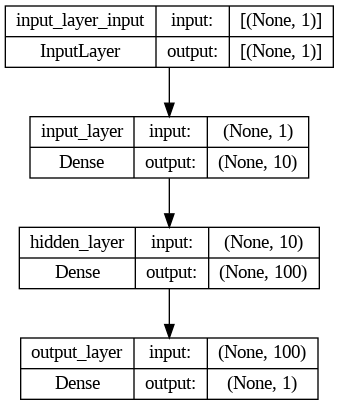

In [289]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualize model's predictions

To visualize predictions, its a good idea to plot them against the ground truth

In [290]:
# Make Model and get y_pred
# Let's try a bigger dataset to visualize
X = tf.range(-100, 100, 4)
y = X + 10

# Split data  80/20 train and test sets
X_train, X_test, y_train, y_test = X[:int(len(X) * .8)], X[int(len(X) * .8):], y[:int(len(y) * .8)], y[int(len(y) * .8):]

# Create the model
tf.random.set_seed(seed=42)
model = tf.keras.Sequential()

# More neurons (hidden layers) with 100 hidden units
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))
model.add(layer=tf.keras.layers.Dense(units=100, activation='relu'))

# Output layer
model.add(layer=tf.keras.layers.Dense(units=1))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0135), # Optimizer changed to Adam. Lower learning rate (default = .01)
    loss=tf.keras.losses.mae
)

model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100) # More iterations

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 38.6947
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5085
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6310
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 21.3902
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.3298
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 6.7397
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 6.6119
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.2263
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 6.5688
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 6.4789
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss: 5.4201
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 5.4406
Epoch 13/100
2/2 [==============================] - 0s

In [291]:
# Predictions
y_pred = model.predict(x=X_test)

1/1 [==============================] - 0s 77ms/step


In [292]:
# Function to plot
def compare_train_test_pred(train_labels=y_train, train_data=X_train, test_labels=y_test, test_data=X_test, y_pred=y_pred):
  '''
  plots training data, test data & compares predictions to ground truth
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label='training data')
  plt.scatter(test_data, test_labels, c='g', label='test data')
  plt.scatter(test_data, y_pred, c='r', label='predictions')
  plt.legend()

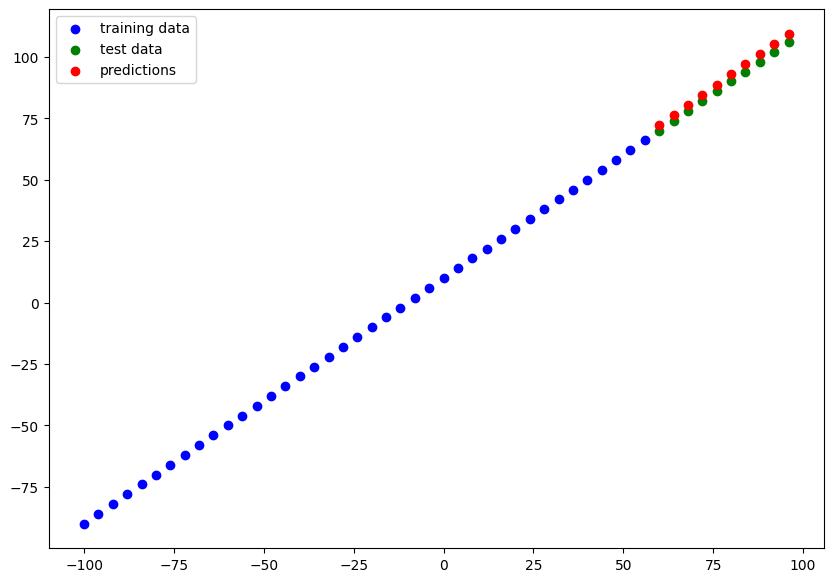

In [293]:
# Plot em'!
compare_train_test_pred()

### Evaluating model with regression metrics
- **Mean Absolute Error**: Average Absolute Error - *tf.keras.losses.MAE()*
- **Mean Square Error**: Square of average errors. Use when larger errors are more significant than smaller errors. **Highlights Outliers** - *tf.keras.losses.MSE()*
- **Huber** - Combination of MSE & MAE. Less sensitive to outliers than MSE - *tf.keras.losses.Huber()*

In [294]:
# Evaluate model on test using .evaluate

'''
returns the loss value & metrics values for the model in test mode
You set the loss & metrics when you compile the model
'''
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 177ms/step - loss: 2.8204


2.820441484451294

Before gathering metrics, we must make sure that the y_test and y_pred vectors are the same shape

In [295]:
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 72.243904],
        [ 76.371605],
        [ 80.49934 ],
        [ 84.62771 ],
        [ 88.75607 ],
        [ 92.88444 ],
        [ 97.012794],
        [101.14116 ],
        [105.26953 ],
        [109.397896]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

**Key Notes**
- predictions are 10, 1 and test is 10! They must be the same shape to evaluate!
- Additionally: need to convert y_pred to a Tensor dtype!
- Convert to y_pred to tensor and then squeeze the tensor to get rid of the 1 dimension!


In [296]:
y_pred = tf.constant(y_pred)
y_pred= tf.squeeze(input=y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.243904,  76.371605,  80.49934 ,  84.62771 ,  88.75607 ,
        92.88444 ,  97.012794, 101.14116 , 105.26953 , 109.397896],
      dtype=float32)>

In [297]:
# Now that y_pred and y_true are the same shape Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.8204446>

EagerTensor is a class in the TensorFlow Python framework that represents a tensor that is evaluated immediately.
This is in contrast to a graph tensor, which is a tensor that is not evaluated until it is needed.
EagerTensors are useful for debugging and interactive development.
Can turn into a NumPy array by calling .numpy()

In [298]:
# Calculate the mean square error too!
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=y_pred).numpy()
mse

8.09064

In [299]:
print(f'MSE: {mse}\nMAE: {mae.numpy()}')

MSE: 8.0906400680542
MAE: 2.8204445838928223


In [300]:
# make function to get MAE & MSE
def mae_mse(y_true=y_test, y_pred=y_pred) -> tuple:
  '''
  returns mae and mse in form of tuple given y_true and y_pred arguments
  '''
  mae = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred).numpy()
  mse = tf.keras.losses.MSE(y_true=y_test, y_pred=y_pred).numpy()
  return (mae, mse)

In [301]:
mae, mse = mae_mse()
mae, mse

(2.8204446, 8.09064)

### Experimentation to improve Model
Experiment, Experiment, Experiment <br>
'''
Build a model -> fit it -> evaluate it -> tweak it -> repeat
'''
1. Get more data
2. Make model more complex (more layers or more hidden units in layers)
3. Train for longer

**KEY** - Always start with small, simple models and build complexity as needed


In [302]:
X = tf.range(-100, 100, 4)
y = X + 10

# Split data
d_split = int(len(X) * .8)
X_train, y_train = X[:d_split], y[:d_split]
X_test, y_test = X[d_split:], y[d_split:]

Let's do 3 experiments:
1. 1 layer, 100 epochs
2. 2 layers, 100 epochs
3. 2 layers, 500 epochs

In [303]:
# Set seed
tf.random.set_seed(42)

# Create model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

# compile model
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# fit the model
model1.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 14.9846 - mae: 14.9846
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.3855 - mae: 8.3855
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5274 - mae: 10.5274
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.0360 - mae: 13.0360
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0920 - mae: 12.0920
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3528 - mae: 9.3528
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5049 - mae: 8.5049
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0337 - mae: 9.0337
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5974 - mae: 18.5974
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0247 - mae: 10.0247
Epoch 11/100
2/2 [==============================] - 0s 10ms/step -

1/1 [==============================] - 0s 83ms/step


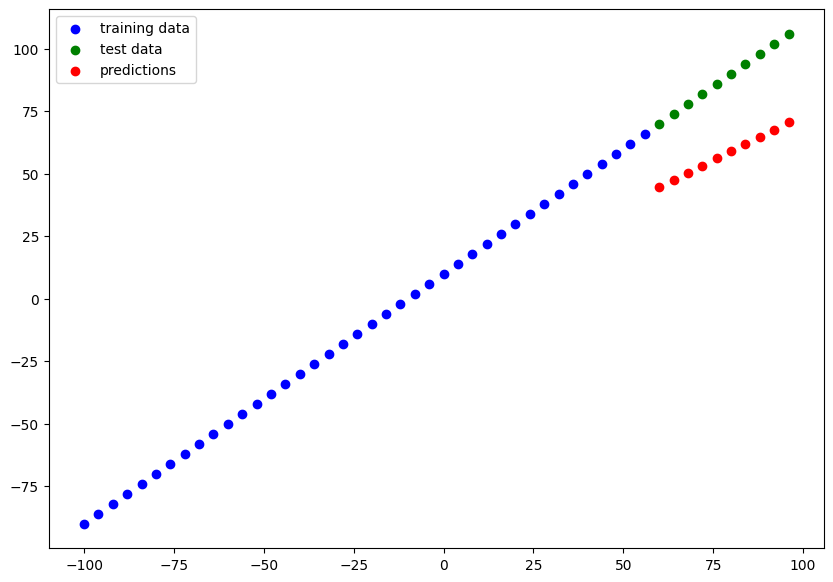

In [304]:
# Make and plot predictions for model 1
y_pred1 = model1.predict(x=X_test)
compare_train_test_pred(y_pred=y_pred1)

In [305]:
# Calculate model_1 evaluation metrics
y_pred1 = tf.constant(tf.squeeze(y_pred1))
mae1, mse1 = mae_mse(y_pred=y_pred1)
mae1, mse1

(30.402811, 934.5719)

In [306]:
# Update compare function to do squeezing, practice by rewriting
def model_mae_mse(y_true=y_test, y_pred=y_pred) -> tuple:
  y_pred = tf.constant(tf.squeeze(y_pred))
  mae = tf.keras.losses.MAE(y_true=y_true, y_pred=y_pred).numpy()
  mse = tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred).numpy()
  return (mae, mse)

In [307]:
# Calculate model1 evaluation metrics w/out need to squeeze (done in function)
mae1, mse1 = model_mae_mse(y_true=y_test, y_pred=y_pred1)
mae1, mse1

(30.402811, 934.5719)

In [308]:
# Model 2
tf.random.set_seed(seed=42)

# Create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

# Compile model
model2.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# Fit model
model2.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 90ms/step


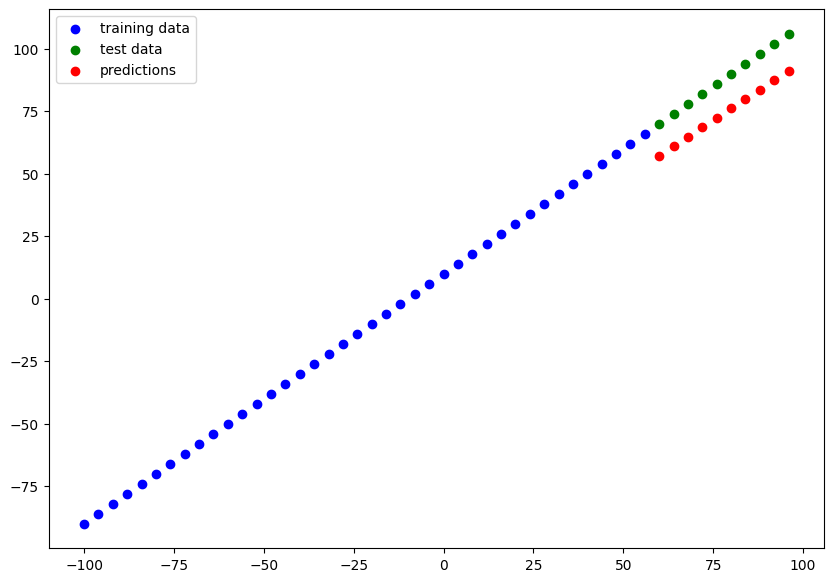

In [309]:
# Plot
y_pred2 = model2.predict(x=X_test)
compare_train_test_pred(y_pred=y_pred2)

In [310]:
# MAE & MSE
mae2, mse2 = model_mae_mse(y_pred=y_pred2)
mae2, mse2

(13.773933, 190.15044)

In [311]:
# Model 3

tf.random.set_seed(seed=42)

# Create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=tf.math.tanh),
    tf.keras.layers.Dense(1)
])

# Compile model
model3.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# fit model
model3.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 1932.9553 - mae: 36.8603
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 1349.1829 - mae: 30.1633
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 675.1476 - mae: 21.5025
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 1169.1635 - mae: 27.5346
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 602.7349 - mae: 20.6964
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 694.0410 - mae: 22.2267
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 742.0963 - mae: 22.7769
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 618.6001 - mae: 20.6989
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 706.2916 - mae: 22.1005
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 725.5616 - mae: 21.7954
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 120ms/step


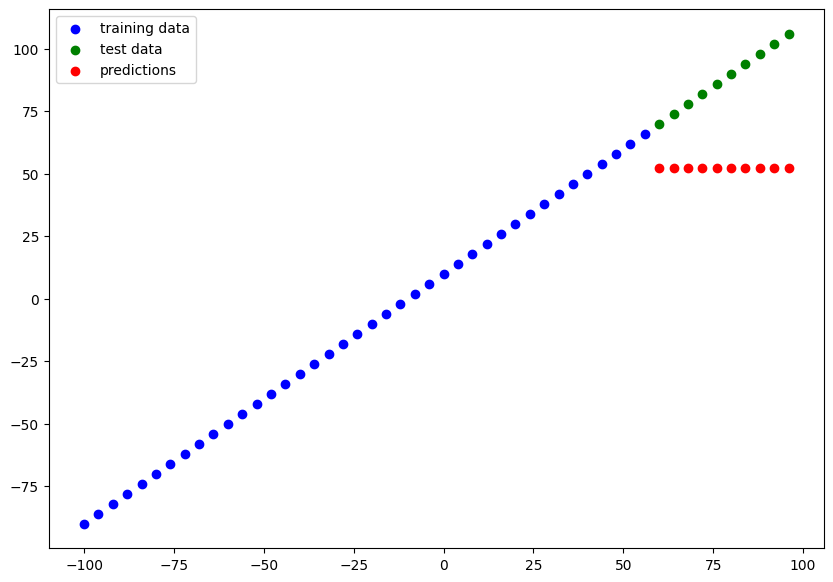

In [312]:
y_pred3 = model3.predict(x=X_test)
compare_train_test_pred(y_pred=y_pred3)

In [313]:
mae3, mse3 = model_mae_mse(y_pred=y_pred3)
mae3, mse3

(35.74558, 1409.7465)

**Model 3 is overfit!**

### Comparing the Results of our Experiments

In [314]:
# Create Data frame to easily compare results
mod_results = [
    ['model1', mae1, mse1],
    ['model2', mae2, mse2],
    ['model3', mae3, mse3]
  ]
model_results_df = pd.DataFrame(data=mod_results, columns=['Model', 'MAE', 'MSE'])
model_results_df

,Model,MAE,MSE
0,model1,30.402811,934.571899
1,model2,13.773933,190.150436
2,model3,35.745579,1409.746460


In [315]:
model2.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                20        
                                                                 
 dense_117 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**NOTE**: Minimize time between experiments. May 1 small change, run and see results. Iterate quickly to find out what works and what doesn't <br><br>

As you build more models, you'll want to look into using:
- **Tensorboard** - Component of TF library to help track model experiment results
- **Weights and Biases** - tool for tracking all kinds of ML experiments (plugs straight into TensorBoard

### Save & Load Tensorflow Models

2 Main formats:
1. SavedModel format - Use if staying in TensorFlow environment
2. HDF5 format  - Use if going outside of TensorFlow environment

In [316]:
# SavedModel format
model2.save("model_2_SavedModel_Format")

In [317]:
# Save in HDF5 format
model2.save("model_2_HTF5_format.h5")

In [318]:
# Load SavedModel
loaded_model = tf.keras.models.load_model('/content/model_2_SavedModel_Format')

# Show it loaded
loaded_model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                20        
                                                                 
 dense_117 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [319]:
# show the predictions are the same for model2 as for loaded model
y_pred_loaded = loaded_model.predict(x=X_test)
y_pred_loaded == y_pred2

1/1 [==============================] - 0s 107ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [320]:
# Load in model usign .h5 model
loaded_model_h5 = tf.keras.models.load_model('/content/model_2_HTF5_format.h5')
test_load_pred = loaded_model_h5.predict(x=X_test)
test_load_pred == y_pred2

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Quick side tangent - how to download files in Google colab using code (not sure why I wouldn't just right click and download, but fun to know!)

In [321]:
from google.colab import files
# files.download('/content/model.png')

### Putting it Together

###### Part 1: preparing a
*Medical Charge Dataset* - Predict charges based on age, sex, bmi, children, smoker, region

In [322]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [324]:
###### Must turn Dtypes into numerical encoding
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [325]:
# Get average & median charges
avg_charge = round(df['charges'].mean(), 2)
median_charge = round(df['charges'].median(), 2)
avg_charge, median_charge

(13270.42, 9382.03)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


In [327]:
# Seperate features & columns
X = df.drop('charges', axis=1)
y = df['charges']

In [328]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [329]:
# Create, compile, fit model
nn_r = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # output layer
])

nn_r.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

nn_r.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, epochs=100, verbose=0)

In [330]:
# Check model performance
nn_r.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 8497.5195 - mae: 8497.5195


[8497.51953125, 8497.51953125]

##### Poor performing model above, can we improve?

In [339]:
tf.random.set_seed(seed=42)
nn_r2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) # output layer
])

nn_r2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = nn_r2.fit(x=tf.expand_dims(X_train, axis=-1), y=y_train, epochs=100, verbose=0)

In [340]:
# Evaluate
nn_r2.evaluate(x=X_test, y=y_test)

11/11 [==============================] - 0s 5ms/step - loss: 8493.5986 - mae: 8493.5986


[8493.5986328125, 8493.5986328125]

##### Plot Loss Curve!

Text(0.5, 0, 'epochs')

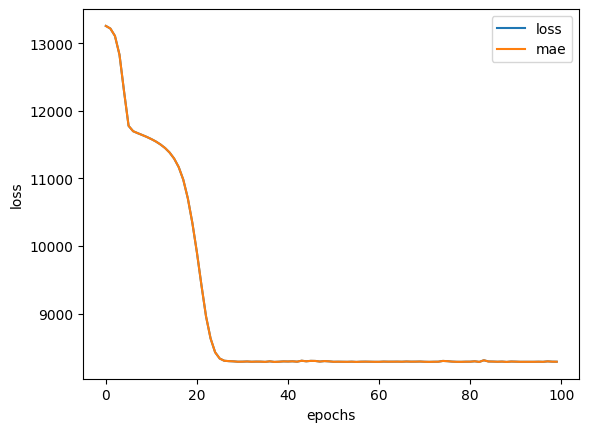

In [341]:
# Plot loss curve (also known as training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**How long should you train for?**

One can use the [EarlyStopping Callback]('https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping'). It is a TensorFlow component one can add to model to stop training once it stops improving a certain metric

In [344]:
# I just want to know how a generic random forest regressor does
rfr = RandomForestRegressor(random_state=42)
history = rfr.fit(X=X_train, y=y_train)
y_pred = rfr.predict(X=X_test)
forest_mae = round(mean_absolute_error(y_true=y_test, y_pred=y_pred), 2)
forest_mae

2653.61

In [334]:
# Linear model
lin_r = ElasticNetCV(eps=0.001, n_alphas=100, l1_ratio=[.1, .3, .75, .9, .95, .99], cv=None, max_iter=1000000)
lin_r.fit(X_train, y_train)
y_pred = lin_r.predict(X_test)
lin_r_mae = round(mean_absolute_error(y_true=y_test, y_pred=y_pred), 2)
lin_r_mae

7476.66

In [335]:
# ADA Boost model
ada_r = AdaBoostRegressor(random_state=42)
ada_r.fit(X_train, y_train)
y_pred = ada_r.predict(X_test)
ada_mae = round(mean_absolute_error(y_true=y_test, y_pred=y_pred), 2)
ada_mae

3678.34

## Preprocessing Data (Normalization & Standardization)

1. Turn Data into numbers
2. Make sure tensors are correct shape
3. Scale features (normalize or standardize, neural networks tend to prefer normalization)

change the values of numeric colulmns in the data set to a common scale without distorting the differences in the range of values <br>

**Normalization (Scake)**
- Converts all values to between 0 & 1 whilst preserving the original distrubition
- *Scikit Learn Function* MinMaxScaler
- Use as the default scaler with Neural Networks
<br>

**Standardization**
- Removes the mean & divides each value the standard deviation
- *Scikit Learn Function* - StandardScaler
- Transform a feature to have close to normal distribution
- *Warning*: This reduces the effect of outliers

Can always try both & compare performance

In [377]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<Axes: ylabel='Frequency'>

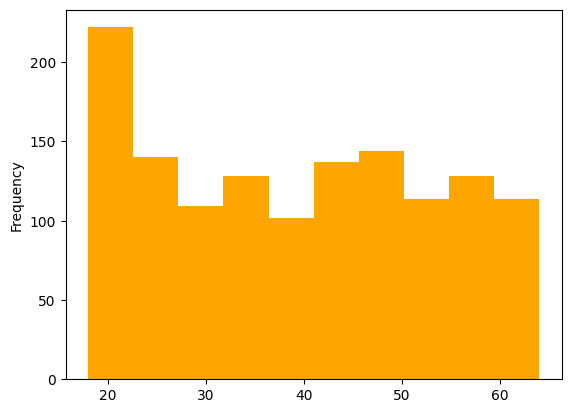

In [378]:
# Show difference in scale for age & bmi
df['age'].plot(kind='hist', color='orange')

<Axes: ylabel='Frequency'>

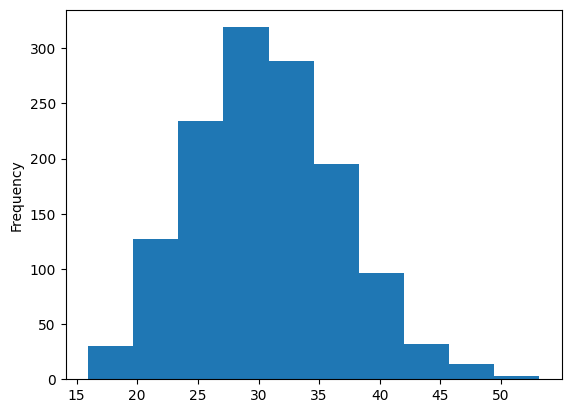

In [379]:
df['bmi'].plot(kind='hist')

In [380]:
# Pass columns that we need to normalize using a column transformer AND
# Pass columns we wish to one hot encode!
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn all data in these columns to be between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

In [381]:
# Features & label
X = df.drop('charges', axis=1)
y = df['charges']

In [382]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [384]:
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Can fit and transform in 1 line
# ct.fit_transform(X_train)

In [390]:
# Look at normalized data
X_train_normal[0:5]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [392]:
# See the new shape
X_train_normal.shape

(1070, 11)

Data is normaliazed & one hot encoded. Build a neural network model to fit on normalized data

In [394]:
tf.random.set_seed(seed=42)

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history = model.fit(x=tf.expand_dims(input=X_train_normal, axis=-1), y=y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13345.0576 - mae: 13345.0576
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13341.9160 - mae: 13341.9160
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13334.7979 - mae: 13334.7979
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13320.5586 - mae: 13320.5586
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13296.0479 - mae: 13296.0479
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13258.2939 - mae: 13258.2939
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 13204.5391 - mae: 13204.5391
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 13132.1104 - mae: 13132.1104
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 13038.3438 - mae: 13038.3438
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 12920.71

In [395]:
model.evaluate(x=X_test_normal, y=y_test)

9/9 [==============================] - 1s 4ms/step - loss: 8621.6562 - mae: 8621.6562


[8621.65625, 8621.65625]